# Exploratory Data Analysis
@Autor: Ana Maria Sandoval Jimenz

In [49]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
import calendar
from pylab import rcParams
#plt.style.use('fivethirtyeight')
#%matplotlib inline
pylab.rcParams['figure.figsize'] = (15.0, 7.0)


# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

Set working directory

In [2]:
print(os.getcwd())
#os.chdir('C:\\Users\\asandovaljim\\Documents\\PythonScripts')
print(os.getcwd())

/Users/tata/Documents/airquality
/Users/tata/Documents/airquality


# Load the data data

## File descriptions
train.csv - the training set

test.csv - the test set

sample_submission.csv - a sample submission file in the correct format

regions.csv - mapping from region codes to names

## Data fields
Id - a unique id

region - an identifier of a region in England

O3 mean - ozone, daily average computed for a particular region 

PM10 mean - particulate matter 10 micrometers or less in diameter, daily average

PM25 mean - particulate matter 2.5 micrometers or less in diameter, daily average

NO2 mean - nitrogen dioxide, daily average

Temperature mean - Temperature at 2 m, daily average

mortality rate - number of of deaths per 100000 people. This variable is missing in the test - your goal is to predict its value!

In [3]:
# Load data 
regions = pd.read_csv('regions.csv')
#regions = regions.drop(columns=['Unnamed: 0'])
regions.head(10)



,Code,Region
0,E12000001,North East
1,E12000002,North West
2,E12000003,Yorkshire and The Humber
3,E12000004,East Midlands
4,E12000005,West Midlands
5,E12000006,East of England
6,E12000007,London
7,E12000008,South East
8,E12000009,South West


In [4]:
# Load data 
sample_submission = pd.read_csv('sample_submission.csv')
#sample_submission = sample_submission.drop(columns=['Unnamed: 0'])
sample_submission.head(10)

,Id,mortality_rate
0,18404,0
1,18405,0
2,18406,0
3,18407,0
4,18408,0
5,18409,0
6,18410,0
7,18411,0
8,18412,0
9,18413,0


In [5]:
# Load data 
test = pd.read_csv('test.csv')
#test = test.drop(columns=['Unnamed: 0'])
test.head(10)

,Id,region,date,O3,PM10,PM25,NO2,T2M
0,18404,E12000006,2012-05-28,75.980,20.876,19.123,9.713,290.787
1,18405,E12000006,2012-05-29,73.084,21.660,17.794,8.417,288.474
2,18406,E12000006,2012-05-30,59.350,21.925,17.699,10.878,289.889
3,18407,E12000006,2012-05-31,45.991,14.549,11.386,10.302,287.815
4,18408,E12000006,2012-06-01,52.210,11.208,9.545,8.598,287.627
5,18409,E12000006,2012-06-02,68.120,10.118,7.838,6.656,286.108
6,18410,E12000006,2012-06-03,71.991,5.984,4.365,5.341,282.819
7,18411,E12000006,2012-06-04,60.163,6.463,3.320,3.332,282.857
8,18412,E12000006,2012-06-05,51.144,11.273,7.904,10.263,284.485
9,18413,E12000006,2012-06-06,49.828,8.477,6.131,9.648,287.300


In [6]:
# Load data 
train = pd.read_csv('train.csv')
#train = train.drop(columns=['Unnamed: 0'])
train.head(10)

,Id,region,date,mortality_rate,O3,PM10,PM25,NO2,T2M
0,1,E12000001,2007-01-02,2.264,42.358,9.021,NaN,NaN,278.138
1,2,E12000001,2007-01-03,2.030,49.506,5.256,NaN,NaN,281.745
2,3,E12000001,2007-01-04,1.874,51.101,4.946,NaN,NaN,280.523
3,4,E12000001,2007-01-05,2.069,47.478,6.823,NaN,NaN,280.421
4,5,E12000001,2007-01-06,1.913,45.226,7.532,NaN,NaN,278.961
5,6,E12000001,2007-01-07,1.756,53.226,5.607,NaN,NaN,281.504
6,7,E12000001,2007-01-08,1.756,48.177,4.674,NaN,NaN,279.519
7,8,E12000001,2007-01-09,2.147,56.917,5.979,NaN,NaN,281.866
8,9,E12000001,2007-01-10,2.186,45.757,3.433,NaN,NaN,278.044
9,10,E12000001,2007-01-11,1.249,56.388,6.159,NaN,NaN,280.358


Dimensions of the datasets:

In [7]:
# shape of the data
print("Size Regions", regions.shape)
print("Size Sample Submission", sample_submission.shape)
print("Size Test", test.shape)
print("Size Train", train.shape)

Size Regions (9, 2)
Size Sample Submission (7886, 2)
Size Test (7886, 8)
Size Train (18403, 9)


## Descriptive Overview of the data

## Numerical Data 

In [8]:
# for numerical features
regions.describe()

,Code,Region
count,9,9
unique,9,9
top,E12000005,London
freq,1,1


In [9]:
# for numerical features
round(sample_submission.describe(),2)

,Id,mortality_rate
count,7886.00,7886.0
mean,22346.50,0.0
std,2276.64,0.0
min,18404.00,0.0
25%,20375.25,0.0
50%,22346.50,0.0
75%,24317.75,0.0
max,26289.00,0.0


In [10]:
# for numerical features
round(test.describe(),2)

,Id,O3,PM10,PM25,NO2,T2M
count,7886.00,7886.00,7886.00,7886.00,7886.00,7886.00
mean,22346.50,49.53,14.55,8.75,13.14,283.41
std,2276.64,16.09,7.66,6.44,8.85,5.27
min,18404.00,1.56,2.51,0.85,1.39,268.70
25%,20375.25,39.84,9.47,4.62,6.73,279.46
50%,22346.50,50.94,12.36,6.81,10.63,283.52
75%,24317.75,60.38,17.35,10.87,16.86,287.71
max,26289.00,103.72,67.36,56.72,67.06,296.74


In [11]:
# for numerical features
round(train.describe(),2)

,Id,mortality_rate,O3,PM10,PM25,NO2,T2M
count,18403.00,18403.00,18394.00,18394.00,15127.00,11833.00,18403.00
mean,9202.00,1.30,45.33,13.71,7.50,12.05,283.00
std,5312.63,0.30,16.22,7.42,5.76,8.30,5.18
min,1.00,0.44,0.99,2.02,0.90,1.10,265.56
25%,4601.50,1.10,35.07,8.66,3.62,6.06,279.32
50%,9202.00,1.28,45.84,11.70,5.64,9.77,283.27
75%,13802.50,1.47,55.88,16.59,9.33,15.86,287.24
max,18403.00,2.84,105.69,60.63,45.85,76.76,297.21


## Categorical Data 

In [12]:
# data for categorical features
regions.describe(include=["O"])

,Code,Region
count,9,9
unique,9,9
top,E12000005,London
freq,1,1


In [13]:
# data for categorical features
test.describe(include=["O"])

,region,date
count,7886,7886
unique,9,1096
top,E12000008,2014-07-27
freq,1096,9


In [14]:
# data for categorical features
train.describe(include=["O"])

,region,date
count,18403,18403
unique,9,2191
top,E12000005,2009-08-28
freq,2191,9


# Data preparation

## Checking for missing data


In [15]:
def missing_data(df, name):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
    missing_df  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print('Missing values:', name)
    print(round(missing_df,2))

In [16]:
missing_data(regions, 'Regions')

Missing values: Regions
        Total  Percent
Region      0      0.0
Code        0      0.0


In [17]:
missing_data(sample_submission, 'Sample Submission')

Missing values: Sample Submission
                Total  Percent
mortality_rate      0      0.0
Id                  0      0.0


In [18]:
missing_data(test, 'Test Data')

Missing values: Test Data
        Total  Percent
T2M         0      0.0
NO2         0      0.0
PM25        0      0.0
PM10        0      0.0
O3          0      0.0
date        0      0.0
region      0      0.0
Id          0      0.0


In [19]:
missing_data(train, 'Train Data')

Missing values: Train Data
                Total  Percent
NO2              6570    35.70
PM25             3276    17.80
PM10                9     0.05
O3                  9     0.05
T2M                 0     0.00
mortality_rate      0     0.00
date                0     0.00
region              0     0.00
Id                  0     0.00


In [20]:
#check minimum values each attribute
regions.describe()

,Code,Region
count,9,9
unique,9,9
top,E12000005,London
freq,1,1


In [21]:
#check minimum values each attribute
sample_submission.describe()

,Id,mortality_rate
count,7886.000000,7886.0
mean,22346.500000,0.0
std,2276.636444,0.0
min,18404.000000,0.0
25%,20375.250000,0.0
50%,22346.500000,0.0
75%,24317.750000,0.0
max,26289.000000,0.0


In [22]:
#check minimum values each attribute
test.describe()

,Id,O3,PM10,PM25,NO2,T2M
count,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000
mean,22346.500000,49.527998,14.545470,8.749311,13.140902,283.410366
std,2276.636444,16.086797,7.660908,6.437121,8.848008,5.274034
min,18404.000000,1.559000,2.506000,0.850000,1.386000,268.696000
25%,20375.250000,39.843000,9.467250,4.620250,6.732750,279.458500
50%,22346.500000,50.935500,12.364000,6.810000,10.627500,283.518000
75%,24317.750000,60.379000,17.353750,10.872000,16.864750,287.707250
max,26289.000000,103.718000,67.361000,56.717000,67.063000,296.740000


In [23]:
#check minimum values each attribute
train.drop('Id', axis=1, inplace=True)
train.describe()

,mortality_rate,O3,PM10,PM25,NO2,T2M
count,18403.000000,18394.000000,18394.000000,15127.000000,11833.000000,18403.000000
mean,1.301737,45.325857,13.712272,7.498714,12.045813,283.002235
std,0.304161,16.221330,7.421616,5.758357,8.296675,5.182186
min,0.439000,0.988000,2.020000,0.904000,1.104000,265.562000
25%,1.102000,35.074250,8.656250,3.624000,6.056000,279.321500
50%,1.281000,45.836000,11.704500,5.636000,9.769000,283.270000
75%,1.474000,55.881000,16.589000,9.326500,15.858000,287.240500
max,2.841000,105.693000,60.627000,45.846000,76.765000,297.209000


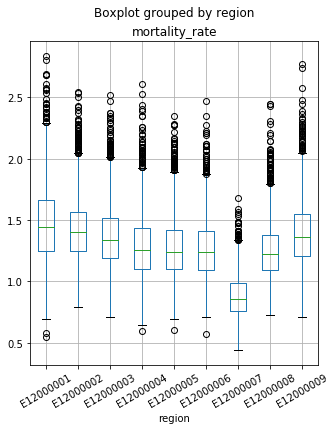

In [24]:
train.boxplot('mortality_rate','region',rot = 30,figsize=(5,6))

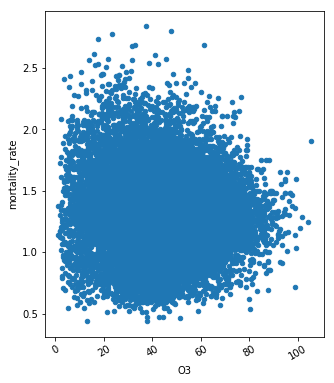

In [25]:
train.plot('O3', 'mortality_rate',rot = 30, kind = 'scatter' , figsize=(5,6))

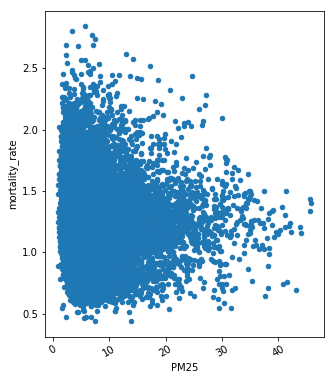

In [26]:
train.plot('PM25', 'mortality_rate',rot = 30, kind = 'scatter' , figsize=(5,6))

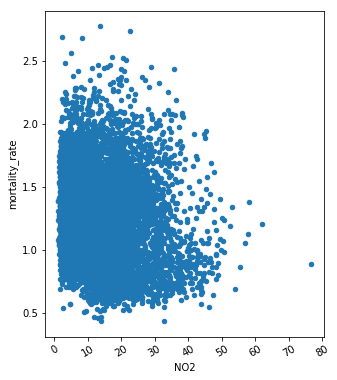

In [27]:
train.plot('NO2', 'mortality_rate',rot = 30, kind = 'scatter' , figsize=(5,6))

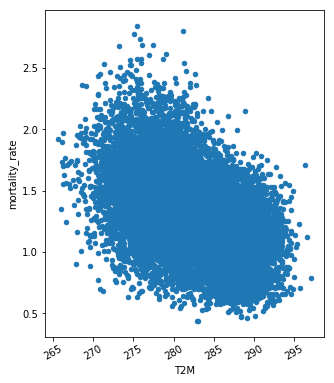

In [28]:
train.plot('T2M', 'mortality_rate',rot = 30, kind = 'scatter' , figsize=(5,6))

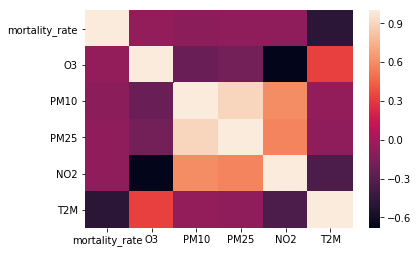

In [29]:
corr = train.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

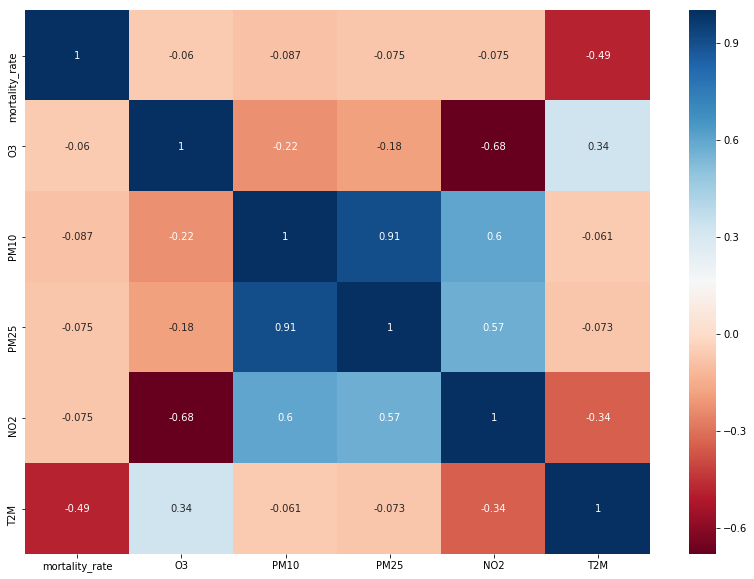

In [30]:
plt.figure(figsize = [14,10])
sns.heatmap(train.corr(), cmap = 'RdBu', annot = True)

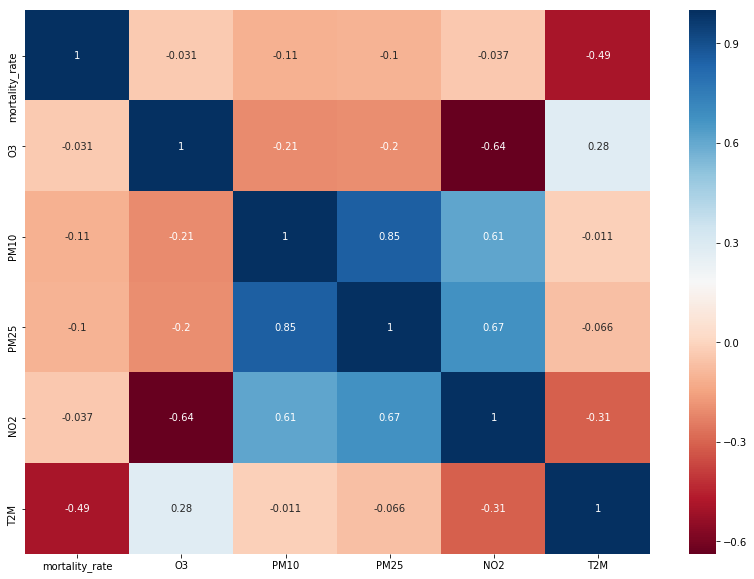

In [31]:
plt.figure(figsize = [14,10])
sns.heatmap(train.corr(method = 'spearman'), cmap = 'RdBu', annot = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117099358>,
      dtype=object)

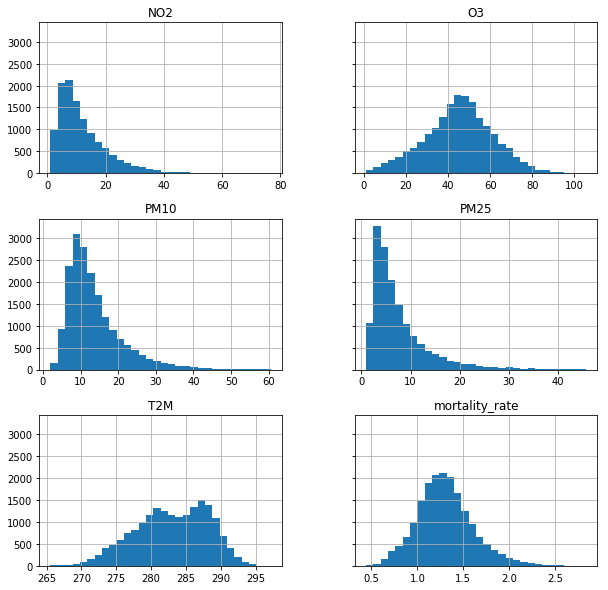

In [32]:
train.hist(bins=30,sharey=True,figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117a4a0f0>,
      dtype=object)

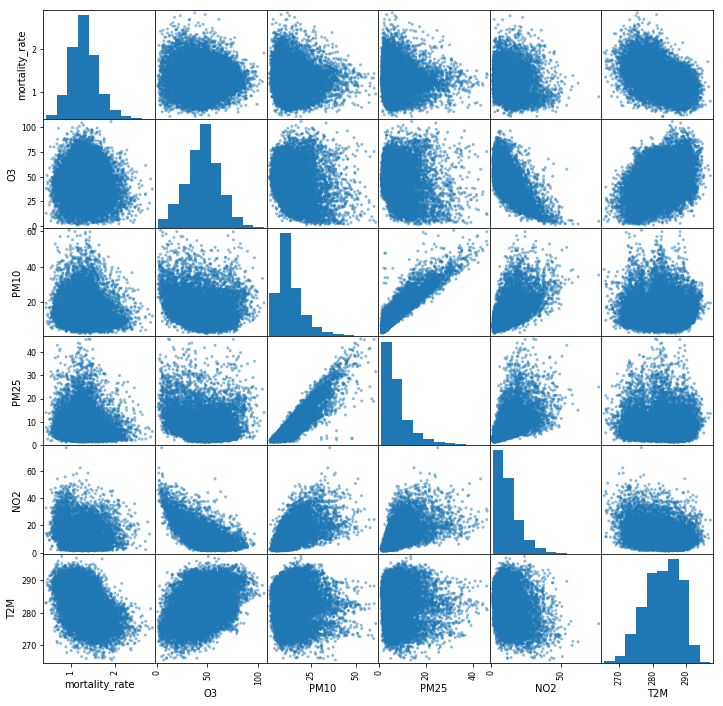

In [33]:
pd.plotting.scatter_matrix(train,figsize=(12,12))

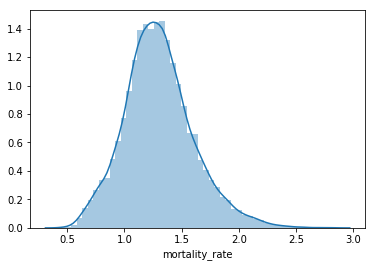

In [34]:
sns.distplot(train.mortality_rate)

In [35]:
train.groupby('region', axis=0).min(level = 'date')


,date,mortality_rate,O3,PM10,PM25,NO2,T2M
region,,,,,,,
E12000001,2007-01-02,0.544,7.022,2.020,0.904,1.104,266.057
E12000002,2007-01-02,0.790,4.244,2.661,0.985,2.226,266.256
E12000003,2007-01-02,0.708,4.199,3.697,1.380,2.787,266.142
E12000004,2007-01-02,0.595,2.294,3.685,1.688,3.109,266.245
E12000005,2007-01-02,0.606,1.974,2.465,1.433,2.024,265.562
E12000006,2007-01-02,0.574,2.255,3.199,1.546,2.525,268.846
E12000007,2007-01-02,0.439,0.988,5.614,2.346,6.851,267.803
E12000008,2007-01-02,0.728,4.608,3.592,1.729,2.951,268.413
E12000009,2007-01-02,0.708,10.409,2.806,1.293,1.456,268.842


In [36]:
train.groupby( 'region' ).date.min().sort_index()

region
E12000001    2007-01-02
E12000002    2007-01-02
E12000003    2007-01-02
E12000004    2007-01-02
E12000005    2007-01-02
E12000006    2007-01-02
E12000007    2007-01-02
E12000008    2007-01-02
E12000009    2007-01-02
Name: date, dtype: object

In [37]:
train.groupby('region', axis=0).max(level = 'date')
train.groupby( 'region' ).date.max().sort_index()

region
E12000001    2012-12-31
E12000002    2012-12-31
E12000003    2012-12-31
E12000004    2012-12-31
E12000005    2012-12-31
E12000006    2012-05-27
E12000007    2011-12-31
E12000008    2011-12-31
E12000009    2011-12-31
Name: date, dtype: object

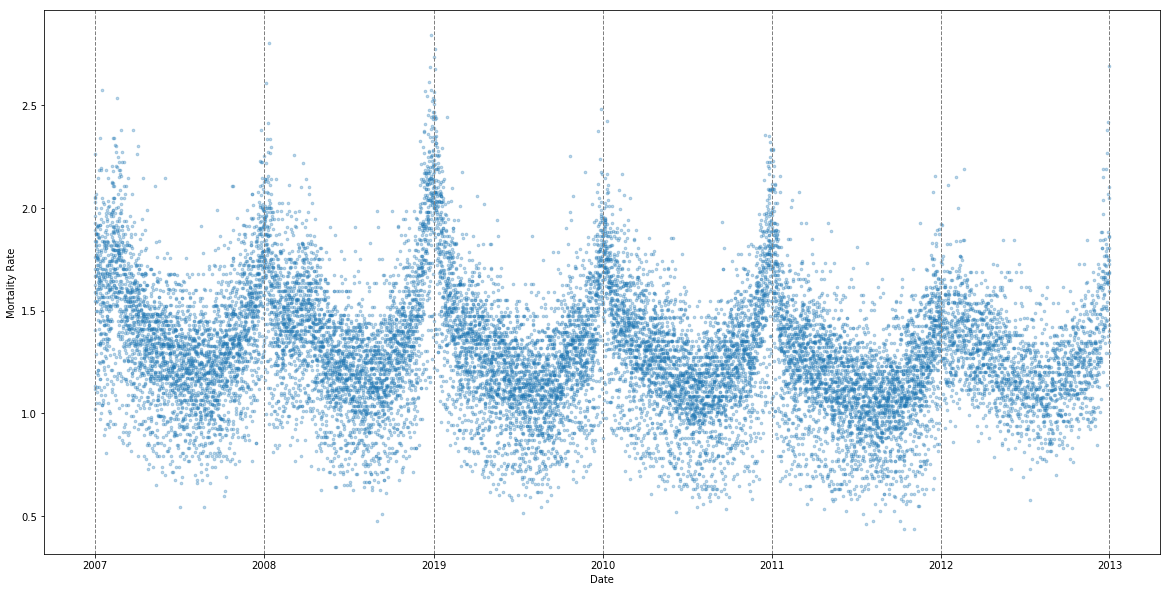

In [38]:
pylab.rcParams['figure.figsize'] = (20.0, 10.0)
plt.scatter(train['date'], train['mortality_rate'], alpha = 0.3, s=7)
plt.xticks(('2007-01-02','2008-01-02','2009-01-02','2010-01-02','2011-01-02','2012-01-02','2012-12-31'),
           ('2007','2008','2019','2010','2011','2012','2013'))
plt.ylabel('Mortality Rate')
plt.xlabel('Date')
plt.grid(axis= 'x', color='grey', linestyle='--', linewidth=1)
plt.show()

In [39]:
import datetime as dt

train['weekday'] = train['date'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d').weekday())
train['month'] = train['date'].apply(lambda x: int(x.split('-')[1]))
train['year'] = train['date'].apply(lambda x: int(x.split('-')[0]))
train.head()


,region,date,mortality_rate,O3,PM10,PM25,NO2,T2M,weekday,month,year
0,E12000001,2007-01-02,2.264,42.358,9.021,NaN,NaN,278.138,1,1,2007
1,E12000001,2007-01-03,2.030,49.506,5.256,NaN,NaN,281.745,2,1,2007
2,E12000001,2007-01-04,1.874,51.101,4.946,NaN,NaN,280.523,3,1,2007
3,E12000001,2007-01-05,2.069,47.478,6.823,NaN,NaN,280.421,4,1,2007
4,E12000001,2007-01-06,1.913,45.226,7.532,NaN,NaN,278.961,5,1,2007


In [40]:
mr_day = train.groupby( 'weekday' ).mortality_rate.mean()
mr_day

weekday
0    1.318310
1    1.312856
2    1.301881
3    1.299507
4    1.312569
5    1.288810
6    1.278227
Name: mortality_rate, dtype: float64

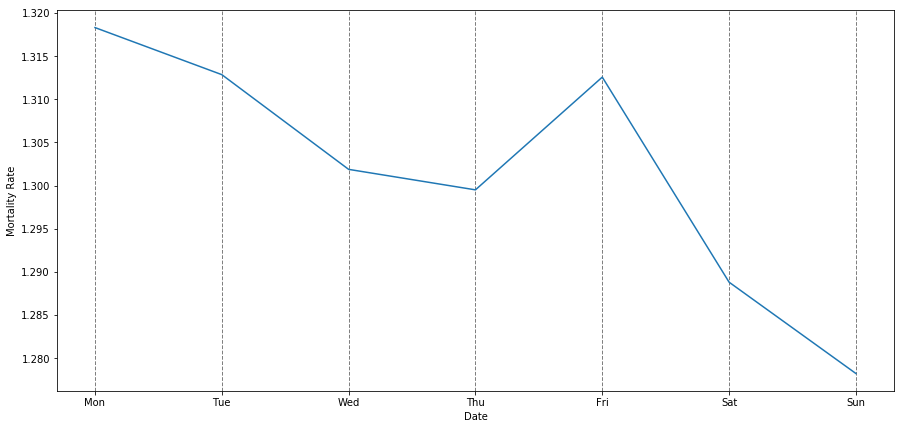

In [41]:
pylab.rcParams['figure.figsize'] = (15.0, 7.0)
plt.plot(calendar.day_abbr,mr_day)
plt.ylabel('Mortality Rate')
plt.xlabel('Date')
plt.grid(axis= 'x', color='grey', linestyle='--', linewidth=1)
plt.show()

In [42]:
mr_month = train.groupby( 'month' ).mortality_rate.mean()
mr_month

month
1     1.607095
2     1.456287
3     1.362614
4     1.310948
5     1.223174
6     1.169154
7     1.128049
8     1.106287
9     1.143004
10    1.233478
11    1.299356
12    1.578534
Name: mortality_rate, dtype: float64

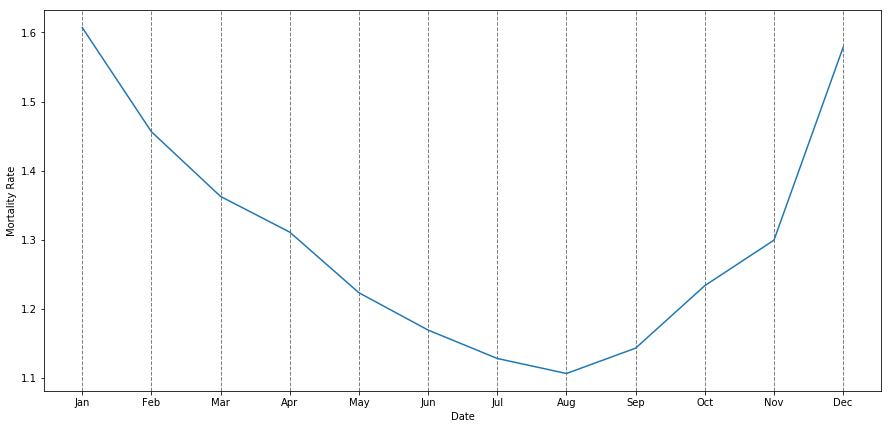

In [43]:
plt.plot(calendar.month_abbr[1:],mr_month)
plt.ylabel('Mortality Rate')
plt.xlabel('Date')
plt.grid(axis= 'x', color='grey', linestyle='--', linewidth=1)
plt.show()

In [44]:
mr_year = train.groupby( 'year' ).mortality_rate.mean()
years = list(range(2007,2013))
mr_year
years

[2007, 2008, 2009, 2010, 2011, 2012]

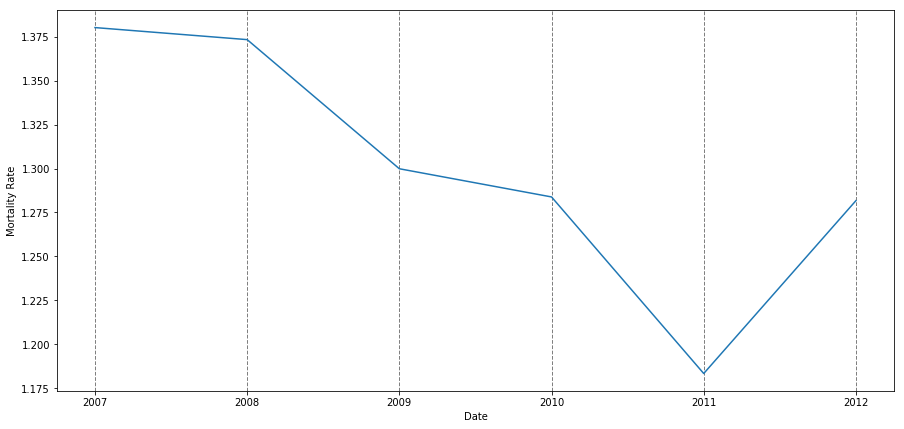

In [52]:
plt.plot(years,mr_year)
plt.ylabel('Mortality Rate')
plt.xlabel('Date')
plt.grid(axis= 'x', color='grey', linestyle='--', linewidth=1)
plt.show()

In [46]:
mr_region = train.groupby( 'region' ).mortality_rate.mean()
mr_region

region
E12000001    1.473910
E12000002    1.433979
E12000003    1.375423
E12000004    1.283637
E12000005    1.277215
E12000006    1.269804
E12000007    0.881647
E12000008    1.255831
E12000009    1.399500
Name: mortality_rate, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

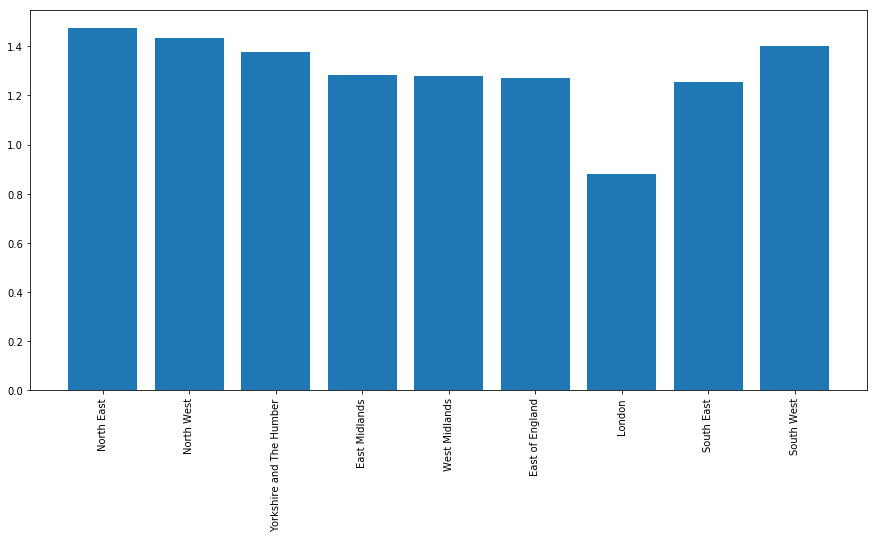

In [47]:
plt.bar(regions['Region'],mr_region)
plt.xticks(rotation=90)